<a href="https://colab.research.google.com/github/naoroha/Final-Project-Deep-Learning/blob/main/DeepLearningFInalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#final project
we will start with extracting the data and modify it

In [1]:
import pandas as pd
import requests
from pathlib import Path

# URL to download the Excel file from GitHub
url = "https://github.com/naoroha/Final-Project-Deep-Learning/raw/main/FM_dataset.xlsx"

# Check if the file exists
if not Path("FM_dataset.xlsx").is_file():
    # Download the file from GitHub
    response = requests.get(url)

    # Check if the download was successful
    if response.status_code == 200:
        # Save the file
        with open("FM_dataset.xlsx", "wb") as f:
            f.write(response.content)
    else:
        print("Failed to download the file")

# Read the Excel file into a DataFrame
df_design = pd.read_excel("FM_dataset.xlsx", sheet_name="design", engine="openpyxl")
df_data = pd.read_excel("FM_dataset.xlsx", sheet_name="data", engine="openpyxl")


In [2]:
#get some of the noises out
df_design = df_design[~df_design['sample'].str.contains('Fam')].reset_index(drop=True)
df_design = df_design[~df_design['sample'].str.contains('House')].reset_index(drop=True)
print(df_design['sample'])

0       Pt_Ctrl_101
1       Pt_Ctrl_117
2       Pt_Ctrl_155
3       Pt_Ctrl_156
4       Pt_Ctrl_188
           ...     
120    Pt_Fibro_934
121    Pt_Fibro_936
122    Pt_Fibro_946
123    Pt_Fibro_962
124    Pt_Fibro_989
Name: sample, Length: 125, dtype: object


In [3]:
X = df_data[df_design['sample']]
y = df_design['diagnosis']
X

,Pt_Ctrl_101,Pt_Ctrl_117,Pt_Ctrl_155,Pt_Ctrl_156,Pt_Ctrl_188,Pt_Ctrl_190,Pt_Ctrl_199,Pt_Ctrl_201,Pt_Ctrl_205,Pt_Ctrl_216,...,Pt_Fibro_884,Pt_Fibro_907,Pt_Fibro_908,Pt_Fibro_932,Pt_Fibro_933,Pt_Fibro_934,Pt_Fibro_936,Pt_Fibro_946,Pt_Fibro_962,Pt_Fibro_989
0,0,1,0,1,0,0,0,125,0,0,...,0,2,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,0,0,4,0,0,...,0,156,0,0,0,0,0,0,35,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,148,0,0,0,0,...,0,91,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
1617,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,19,0
1618,0,0,0,0,0,0,0,0,0,0,...,0,0,43,0,0,0,0,0,0,0


##Turn data into tensors and create a train and test split

In [4]:
import torch

In [5]:
X_numpy = X.values
y_numpy = y.values
# Convert numpy array to PyTorch tensor
X = torch.tensor(X_numpy, dtype=torch.float)
y = torch.tensor(y_numpy, dtype=torch.float)

In [6]:
X=X.t()

In [7]:
X.shape

torch.Size([125, 1620])

In [8]:
mean = X.mean(dim=0)
std = X.std(dim=0)
X = (X - mean) / (std + 1e-6)  # Adding a small epsilon to avoid division by zero

In [9]:
# We will now split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:10],X_test[:10],len(y_train),len(y_test)

(tensor([[-0.1646, -0.1091, -0.1601,  ..., -0.2164, -0.1448, -0.2698],
         [-0.1646, -0.1091, -0.2046,  ...,  1.2689, -0.1448, -0.0954],
         [-0.1521, -0.1091, -0.1156,  ..., -0.2164, -0.1448,  1.4745],
         ...,
         [-0.1584, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
         [-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
         [-0.1584, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698]]),
 tensor([[-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
         [-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
         [ 0.3603, -0.1091, -0.2046,  ...,  0.0572, -0.1448, -0.2698],
         ...,
         [-0.1646, -0.1091,  1.3074,  ...,  0.5263, -0.1448, -0.0954],
         [-0.1646, -0.1091, -0.2490,  ...,  0.1745, -0.1448, -0.2698],
         [-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698]]),
 100,
 25)

## building a model

building a model to classify our blue and red dots

we want to:
1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one not really necessary here, but good practice

2. Construct a model(subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and testing loop

In [10]:
import torch
from torch import nn

#Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses '`nn.Module`'(almost all models in pyTorch subclass `nn.module`)
2. We will start with 2`nn.Linear()` layers that are capable of handeling the shapes of our data
3. Defines a `forward()` method the outlines the forward pass(or forward computation) of the model
4. Instatiate an intance of our model class and sent it to terget `device`



In [11]:
# in oreder to decide the "in_features" in our first layer we need to know our features shape
X_test[:10]


tensor([[-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
        [-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698],
        [ 0.3603, -0.1091, -0.2046,  ...,  0.0572, -0.1448, -0.2698],
        ...,
        [-0.1646, -0.1091,  1.3074,  ...,  0.5263, -0.1448, -0.0954],
        [-0.1646, -0.1091, -0.2490,  ...,  0.1745, -0.1448, -0.2698],
        [-0.1646, -0.1091, -0.2490,  ..., -0.2164, -0.1448, -0.2698]])

In [12]:
## how linear the data

# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# lgs = logreg.score(X_test,y_test)
# print(lgs)

In [13]:
# construct a model that subclasses nn.module, **Version 0**
class FibromyalgiaV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=1620, out_features=64) # takes a full cordinate of 'X_train' and downscales it to 64 features
    self.layer_2 = nn.Linear(in_features=64, out_features=1) # takes the previous out 64 features and turns it to the expected output
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

model_0 = FibromyalgiaV0().to(device)
model_0

FibromyalgiaV0(
  (layer_1): Linear(in_features=1620, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [14]:
# Make predictions
with torch.inference_mode():
  untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions:\n {untrained_preds[:10]} ")
print(f"\n First 10 labels:\n {y_test[:10]} ")

Length of predictions: 25, Shape: torch.Size([25, 1])
Length of test samples: 25, Shape: torch.Size([25])

 First 10 predictions:
 tensor([[ 0.1975],
        [ 0.1709],
        [-0.0870],
        [-0.1318],
        [ 0.0769],
        [ 0.0737],
        [ 0.3600],
        [-0.2168],
        [ 0.4327],
        [ 0.0655]]) 

 First 10 labels:
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 0.]) 


In [15]:
# Setup the loss function, the mission is to classify, so we will might want to use cross-entropy
loss_fn= nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sgmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [16]:
#Calaculate accuracy
def accuarcy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc

## Train model

1. Forward pass
2. Calculate the loss
3. optimizer zero grad
4. Loss backwards (backpropagation)
5. Optimizer step (gardient descent)

### 1. Going from raw logits -> prediction probablities -> prediction labelss

our model outputs are going to be raw **logits**.

we can conveert these **logits** into **prediction propabilities** by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification).
Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [17]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1975],
        [ 0.1709],
        [-0.0870],
        [-0.1318],
        [ 0.0769]])

In [18]:
# use the sigmoid activation function on our model logits in order to turn them to propabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5492],
        [0.5426],
        [0.4783],
        [0.4671],
        [0.5192]])

In [19]:
# Find the predicted lebels
y_preds =torch.round(y_pred_probs)

# In Full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


# Building the training and test loop



In [20]:
torch.manual_seed(42)
test_loss=prev_loss=1

# Set the number of epoches
epochs = 300

# put data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for  epoch in range(epochs):
  ###Training
  prev_loss = test_loss
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

  #Calculate the loss
  '''
  nn.BCELoss insted of nn.BCEWithLogitsLoss
    loss = loss_fn(torch.sigmoid(y_logits)
                    ,y_train)
  '''
  train_loss = loss_fn(y_logits,
                 y_train)
  train_acc = accuarcy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3.Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ###testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss and acc
    test_loss= loss_fn(test_logits,
                       y_test)
    test_acc= accuarcy_fn(y_true=y_test,
                          y_pred=test_pred)
  if epoch % 50 == 0:
    print(f"Epoch= {epoch} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")


Epoch= 0 | Train_Loss = 0.70751 |  Train_Accuarcy = 53.00 | Test_Loss = 0.69285 | Test_Accuracy = 40.00
Epoch= 50 | Train_Loss = 0.30102 |  Train_Accuarcy = 98.00 | Test_Loss = 0.59185 | Test_Accuracy = 68.00
Epoch= 100 | Train_Loss = 0.13571 |  Train_Accuarcy = 100.00 | Test_Loss = 0.59696 | Test_Accuracy = 68.00
Epoch= 150 | Train_Loss = 0.07162 |  Train_Accuarcy = 100.00 | Test_Loss = 0.62893 | Test_Accuracy = 68.00
Epoch= 200 | Train_Loss = 0.04428 |  Train_Accuarcy = 100.00 | Test_Loss = 0.66404 | Test_Accuracy = 64.00
Epoch= 250 | Train_Loss = 0.03056 |  Train_Accuarcy = 100.00 | Test_Loss = 0.69690 | Test_Accuracy = 60.00


### Notice

from the metrics above we can see that the gap between the `Train_Loss` and the `Test_Loss` keep rising, which may indecates us to over fitting, which is propably related to the fact that our data is small.
we will try to over come the over fitting by using cross-validation

Fold= 1 | Train_Loss = 0.00668 |  Train_Accuarcy = 100.00 | Test_Loss = 0.02498 | Test_Accuracy = 100.00
Fold= 2 | Train_Loss = 0.00435 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00732 | Test_Accuracy = 100.00
Fold= 3 | Train_Loss = 0.00294 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00422 | Test_Accuracy = 100.00
Fold= 4 | Train_Loss = 0.00231 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00229 | Test_Accuracy = 100.00
Fold= 5 | Train_Loss = 0.00190 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00121 | Test_Accuracy = 100.00


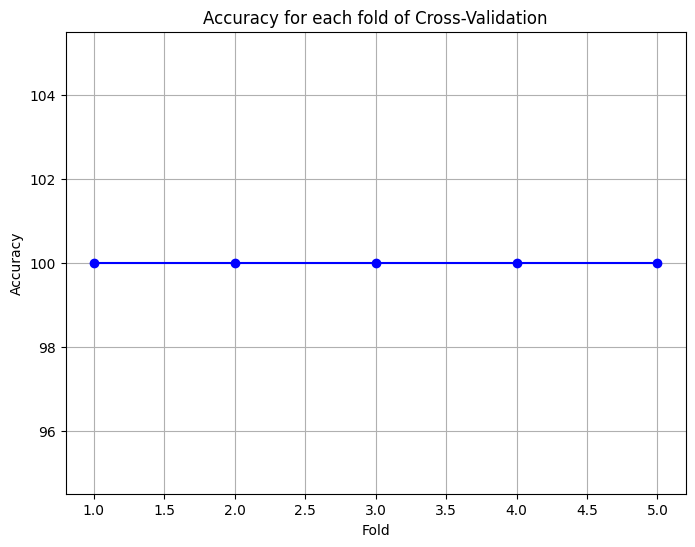

In [21]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np


torch.manual_seed(42)
k = 5

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)
epoches = 300

accuracy_scores = []
i=0

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    i+=1
    X_fold_train, X_validation = X_train[train_index].to(device), X_train[test_index].to(device)
    y_fold_train, y_validation = y_train[train_index].to(device), y_train[test_index].to(device)

    # Build training and evaluation loop
    for epoch in range(epoches):
      ###Training
      model_0.train()

      # 1. Forward pass
      y_logits = model_0(X_fold_train).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

      #Calculate the loss
      '''
      nn.BCELoss insted of nn.BCEWithLogitsLoss
        loss = loss_fn(torch.sigmoid(y_logits)
                        ,y_train)
      '''
      train_loss = loss_fn(y_logits,
                    y_fold_train)
      train_acc = accuarcy_fn(y_true=y_fold_train,
                        y_pred=y_pred)
      # 3.Optimize zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      train_loss.backward()

      # 5. Optimizer step
      optimizer.step()

      ###testing
      model_0.eval()
      with torch.inference_mode():
        #1. Forward pass
        test_logits = model_0(X_validation).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss and acc
        test_loss= loss_fn(test_logits,
                          y_validation)
        test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
    print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

# Plot the performance metric for each fold
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, k+1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold of Cross-Validation')
plt.grid(True)
plt.show()


In [22]:
# check predictions on unseen data
model_0.eval()
with torch.inference_mode():
  #1. Forward pass
  test_logits = model_0(X_test).squeeze()
  untrained_preds = torch.round(torch.sigmoid(test_logits))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions:\n {untrained_preds[:10]} ")
print(f"\n First 10 labels:\n {y_test[:10]} ")
test_acc= accuarcy_fn(y_true=y_test,
                              y_pred=untrained_preds)
print(f"\n accuracy: {test_acc:.2f}")

Length of predictions: 25, Shape: torch.Size([25])
Length of test samples: 25, Shape: torch.Size([25])

 First 10 predictions:
 tensor([0., 1., 0., 1., 0., 0., 0., 1., 0., 0.]) 

 First 10 labels:
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 0.]) 

 accuracy: 60.00


## Cross-Validation sum up
we can see an increse accuracy on unseen data when using Cross-Validation

### Maybe improved model?
we will try to modify a  new version of our model (`FibromyalgiaV1`), we will add another linear layer (`layer_2`) between the existing `layer_1` and the output layer `layer_3`. We will also applly a ReLU activation function after each linear layer to introduce non-linearity to the model.

# Model_1

In [23]:
# construct a model that subclasses nn.module, **Version 1**
class FibromyalgiaV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(1620, 64)  # Input size is 1620, output size is 64
    #self.dropout = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.1 for 10% dropout)
    self.fc2 = nn.Linear(64, 32)
    #self.dropout2 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.1 for 10% dropout)
    self.fc3 = nn.Linear(32, 1)  # Output size is 1 for binary classification

  def forward(self, x):
    x = torch.relu(self.fc1(x))    # Apply ReLU activation function
    x = torch.tanh(self.fc2(x))  # Apply tanh activation to the second layer
    x = self.fc3(x)  # Output layer without activation function
    return x

model_1 = FibromyalgiaV1().to(device)
model_1

FibromyalgiaV1(
  (fc1): Linear(in_features=1620, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [24]:
# construct a model that subclasses nn.module, **Version 1**
class FibromyalgiaV1B(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(1620, 50)  # Input size is 1620, output size is 64
    #self.dropout = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.1 for 10% dropout)
    self.fc2 = nn.Linear(50, 12)
    #self.dropout2 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.1 for 10% dropout)
    self.fc3 = nn.Linear(12, 1)  # Output size is 1 for binary classification

  def forward(self, x):
    x = torch.relu(self.fc1(x))    # Apply ReLU activation function
    x = torch.tanh(self.fc2(x))  # Apply tanh activation to the second layer
    x = self.fc3(x)  # Output layer without activation function
    return x

model_1B = FibromyalgiaV1B().to(device)
model_1B

FibromyalgiaV1B(
  (fc1): Linear(in_features=1620, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)

In [25]:
# Setup the loss function, the mission is to classify, so we will might want to use cross-entropy
loss_fn= nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sgmoid activation function built-in

optimizer = torch.optim.SGD(params=model_1B.parameters(), lr=0.01)

In [26]:
# torch.manual_seed(42)

# # Set the number of epoches
# epochs = 300

# # put data to target device
# X_train,y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# # Build training and evaluation loop
# for epoch in range(epochs):
#   ###Training
#   model_1.train()

#   # 1. Forward pass
#   y_logits = model_1(X_train).squeeze()
#   y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

#   #Calculate the loss
#   '''
#   nn.BCELoss insted of nn.BCEWithLogitsLoss
#     loss = loss_fn(torch.sigmoid(y_logits)
#                     ,y_train)
#   '''
#   train_loss = loss_fn(y_logits,
#                  y_train)
#   train_acc = accuarcy_fn(y_true=y_train,
#                     y_pred=y_pred)
#   # 3.Optimize zero grad
#   optimizer.zero_grad()

#   # 4. Loss backward
#   train_loss.backward()

#   # 5. Optimizer step
#   optimizer.step()

#   ###testing
#   model_1.eval()
#   with torch.inference_mode():
#     #1. Forward pass
#     test_logits = model_1(X_test).squeeze()
#     test_pred = torch.round(torch.sigmoid(test_logits))

#     #2. Calculate test loss and acc
#     test_loss= loss_fn(test_logits,
#                        y_test)
#     test_acc= accuarcy_fn(y_true=y_test,
#                           y_pred=test_pred)
#   if epoch % 50 == 0:
#     print(f"Epoch= {epoch} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

Fold= 1 | Train_Loss = 0.70647 |  Train_Accuarcy = 41.25 | Test_Loss = 0.70769 | Test_Accuracy = 45.00
Fold= 2 | Train_Loss = 0.70871 |  Train_Accuarcy = 40.00 | Test_Loss = 0.69872 | Test_Accuracy = 50.00
Fold= 3 | Train_Loss = 0.70677 |  Train_Accuarcy = 41.25 | Test_Loss = 0.70646 | Test_Accuracy = 45.00
Fold= 4 | Train_Loss = 0.70351 |  Train_Accuarcy = 46.25 | Test_Loss = 0.71953 | Test_Accuracy = 25.00
Fold= 5 | Train_Loss = 0.70810 |  Train_Accuarcy = 41.25 | Test_Loss = 0.70116 | Test_Accuracy = 45.00


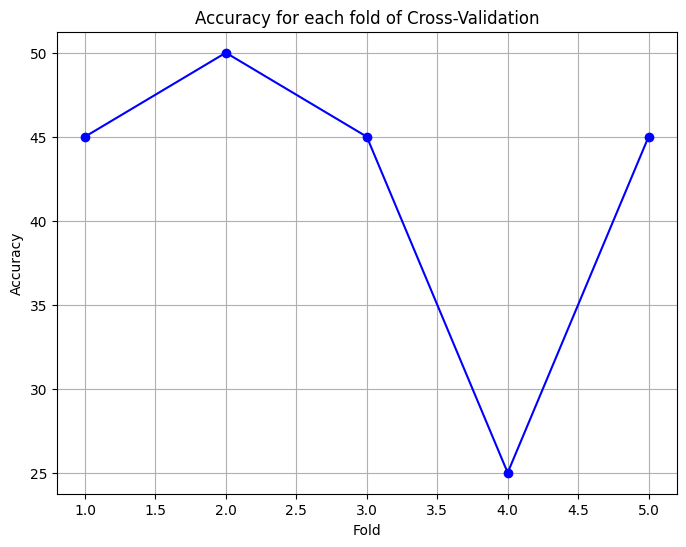

In [28]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np


torch.manual_seed(42)
k = 5

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)
epoches = 100

accuracy_scores = []
i=0

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    i+=1
    X_fold_train, X_validation = X_train[train_index].to(device), X_train[test_index].to(device)
    y_fold_train, y_validation = y_train[train_index].to(device), y_train[test_index].to(device)

    # Build training and evaluation loop
    for epoch in range(epoches):
      ###Training
      model_1.train()

      # 1. Forward pass
      y_logits = model_1(X_fold_train).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

      #Calculate the loss
      '''
      nn.BCELoss insted of nn.BCEWithLogitsLoss
        loss = loss_fn(torch.sigmoid(y_logits)
                        ,y_train)
      '''
      train_loss = loss_fn(y_logits,
                    y_fold_train)
      train_acc = accuarcy_fn(y_true=y_fold_train,
                        y_pred=y_pred)
      # 3.Optimize zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      train_loss.backward()

      # 5. Optimizer step
      optimizer.step()

      ###testing
      model_1.eval()
      with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_validation).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss and acc
        test_loss= loss_fn(test_logits,
                          y_validation)
        test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
    print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

# Plot the performance metric for each fold
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, k+1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold of Cross-Validation')
plt.grid(True)
plt.show()


In [29]:
# check predictions on unseen data
model_1.eval()
with torch.inference_mode():
  #1. Forward pass
  test_logits = model_1(X_test).squeeze()
  untrained_preds = torch.round(torch.sigmoid(test_logits))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions:\n {untrained_preds} ")
print(f"\n First 10 labels:\n {y_test} ")
test_acc= accuarcy_fn(y_true=y_test,
                              y_pred=untrained_preds)
print(f"\n accuracy: {test_acc:.2f}")

Length of predictions: 25, Shape: torch.Size([25])
Length of test samples: 25, Shape: torch.Size([25])

 First 10 predictions:
 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 0.]) 

 First 10 labels:
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 0.]) 

 accuracy: 52.00


# Model_1 sum up
we saw a bit of increcment on the accuracy on an unseen data, let's try to modify the model a bit more by adding it two more layers

# Model_2

In [30]:
# construct a model that subclasses nn.module, **Version 2**
class FibromyalgiaV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(1620, 512)  # Input size is 1620, output size is 512
    self.fc2 = nn.Linear(512, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 1)  # Output size is 1 for binary classification

  def forward(self, x):
    x = torch.relu(self.fc1(x))  # Apply ReLU activation function
    x = torch.relu(self.fc2(x))  # Apply ReLU activation to the second layer
    x = torch.relu(self.fc3(x))  # Apply ReLU activation to the third layer
    x = torch.relu(self.fc4(x))  # Apply ReLU activation to the forth layer
    x = self.fc5(x)  # Output layer without activation function
    return x

model_2 = FibromyalgiaV2().to(device)
model_2

FibromyalgiaV2(
  (fc1): Linear(in_features=1620, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
)

In [31]:
# Setup the loss function, the mission is to classify, so we will might want to use cross-entropy
loss_fn= nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sgmoid activation function built-in

optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)

Fold= 1 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 3.73321 | Test_Accuracy = 55.00
Fold= 2 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.31283 | Test_Accuracy = 95.00
Fold= 3 | Train_Loss = 0.00001 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00004 | Test_Accuracy = 100.00
Fold= 4 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00000 | Test_Accuracy = 100.00
Fold= 5 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00000 | Test_Accuracy = 100.00


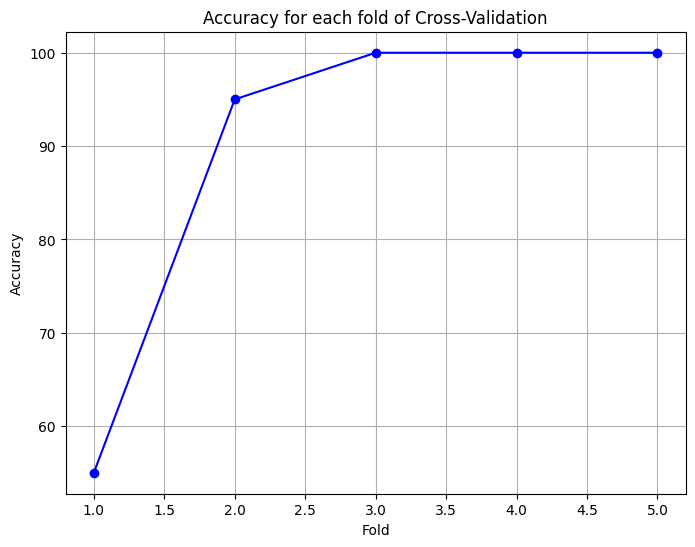

In [32]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np


torch.manual_seed(42)
k = 5

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)
epoches = 150

accuracy_scores = []
i=0

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    i+=1
    X_fold_train, X_validation = X_train[train_index].to(device), X_train[test_index].to(device)
    y_fold_train, y_validation = y_train[train_index].to(device), y_train[test_index].to(device)

    # Build training and evaluation loop
    for epoch in range(epoches):
      ###Training
      model_2.train()

      # 1. Forward pass
      y_logits = model_2(X_fold_train).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

      #Calculate the loss
      '''
      nn.BCELoss insted of nn.BCEWithLogitsLoss
        loss = loss_fn(torch.sigmoid(y_logits)
                        ,y_train)
      '''
      train_loss = loss_fn(y_logits,
                    y_fold_train)
      train_acc = accuarcy_fn(y_true=y_fold_train,
                        y_pred=y_pred)
      # 3.Optimize zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      train_loss.backward()

      # 5. Optimizer step
      optimizer.step()

      ###testing
      model_2.eval()
      with torch.inference_mode():
        #1. Forward pass
        test_logits = model_2(X_validation).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss and acc
        test_loss= loss_fn(test_logits,
                          y_validation)
        test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
    print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

# Plot the performance metric for each fold
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, k+1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold of Cross-Validation')
plt.grid(True)
plt.show()


In [33]:
# check predictions on unseen data
model_2.eval()
with torch.inference_mode():
  #1. Forward pass
  test_logits = model_2(X_test).squeeze()
  untrained_preds = torch.round(torch.sigmoid(test_logits))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions:\n {untrained_preds} ")
print(f"\n First 10 labels:\n {y_test} ")
test_acc= accuarcy_fn(y_true=y_test,
                              y_pred=untrained_preds)
print(f"\n accuracy: {test_acc:.2f}")

Length of predictions: 25, Shape: torch.Size([25])
Length of test samples: 25, Shape: torch.Size([25])

 First 10 predictions:
 tensor([0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 0., 0., 0.]) 

 First 10 labels:
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 0.]) 

 accuracy: 68.00


##Model_3

In [34]:
# construct a model that subclasses nn.module, **Version 3**
class FibromyalgiaV3(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(1620, 512)  # Input size is 1620, output size is 512
    self.dropout1 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.2 for 20% dropout)
    self.fc2 = nn.Linear(512, 128)
    self.dropout2 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.2 for 20% dropout)
    self.fc3 = nn.Linear(128, 64)
    self.dropout3 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.2 for 20% dropout)
    self.fc4 = nn.Linear(64, 32)
    self.dropout4 = nn.Dropout(p=0.2)  # Specify the dropout probability (e.g., 0.2 for 20% dropout)
    self.fc5 = nn.Linear(32, 1)  # Output size is 1 for binary classification

  def forward(self, x):
    x = torch.relu(self.fc1(x))  # Apply ReLU activation function
    x = self.dropout1(x)
    x = torch.relu(self.fc2(x))  # Apply ReLU activation to the second layer
    x = self.dropout2(x)
    x = torch.relu(self.fc3(x))  # Apply ReLU activation to the third layer
    x = self.dropout3(x)
    x = torch.relu(self.fc4(x))  # Apply ReLU activation to the forth layer
    x = self.dropout4(x)
    x = self.fc5(x)  # Output layer without activation function
    return x

model_3 = FibromyalgiaV3().to(device)
model_3

FibromyalgiaV3(
  (fc1): Linear(in_features=1620, out_features=512, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
)

In [35]:
# Setup the loss function, the mission is to classify, so we will might want to use cross-entropy
loss_fn= nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sgmoid activation function built-in
#
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.001)

Fold= 1 | Train_Loss = 0.68093 |  Train_Accuarcy = 68.75 | Test_Loss = 0.69325 | Test_Accuracy = 50.00
Fold= 2 | Train_Loss = 0.68250 |  Train_Accuarcy = 63.75 | Test_Loss = 0.67770 | Test_Accuracy = 70.00
Fold= 3 | Train_Loss = 0.68433 |  Train_Accuarcy = 62.50 | Test_Loss = 0.67440 | Test_Accuracy = 75.00
Fold= 4 | Train_Loss = 0.68638 |  Train_Accuarcy = 62.50 | Test_Loss = 0.67354 | Test_Accuracy = 75.00
Fold= 5 | Train_Loss = 0.67881 |  Train_Accuarcy = 67.50 | Test_Loss = 0.68875 | Test_Accuracy = 55.00


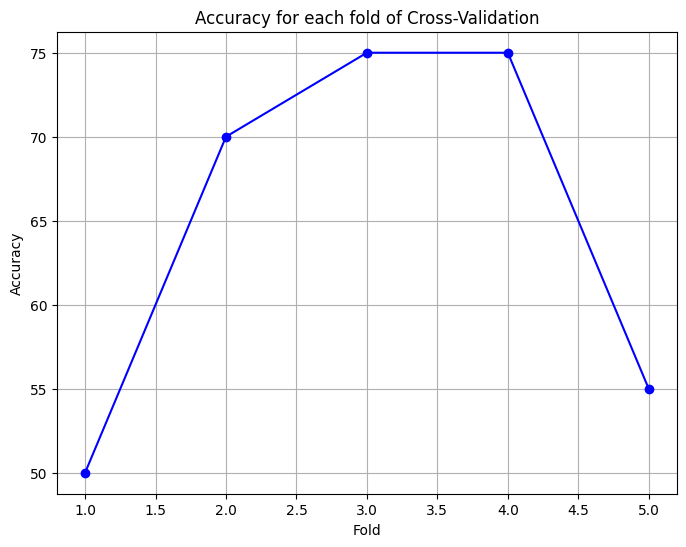

In [36]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np


torch.manual_seed(42)
k = 5

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)
epoches = 20

accuracy_scores = []
i=0

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    i+=1
    X_fold_train, X_validation = X_train[train_index].to(device), X_train[test_index].to(device)
    y_fold_train, y_validation = y_train[train_index].to(device), y_train[test_index].to(device)

    # Build training and evaluation loop
    for epoch in range(epoches):
      ###Training
      model_3.train()

      # 1. Forward pass
      y_logits = model_3(X_fold_train).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

      #Calculate the loss
      '''
      nn.BCELoss insted of nn.BCEWithLogitsLoss
        loss = loss_fn(torch.sigmoid(y_logits)
                        ,y_train)
      '''
      train_loss = loss_fn(y_logits,
                    y_fold_train)
      train_acc = accuarcy_fn(y_true=y_fold_train,
                        y_pred=y_pred)
      # 3.Optimize zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      train_loss.backward()

      # 5. Optimizer step
      optimizer.step()

      ###testing
      model_3.eval()
      with torch.inference_mode():
        #1. Forward pass
        test_logits = model_3(X_validation).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate test loss and acc
        test_loss= loss_fn(test_logits,
                          y_validation)
        test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
    print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

# Plot the performance metric for each fold
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, k+1), accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold of Cross-Validation')
plt.grid(True)
plt.show()


In [37]:
# check predictions on unseen data
model_3.eval()
with torch.inference_mode():
  #1. Forward pass
  test_logits = model_3(X_test).squeeze()
  untrained_preds = torch.round(torch.sigmoid(test_logits))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions:\n {untrained_preds} ")
print(f"\n First 10 labels:\n {y_test} ")
test_acc= accuarcy_fn(y_true=y_test,
                              y_pred=untrained_preds)
print(f"\n accuracy: {test_acc:.2f}")

Length of predictions: 25, Shape: torch.Size([25])
Length of test samples: 25, Shape: torch.Size([25])

 First 10 predictions:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]) 

 First 10 labels:
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 0.]) 

 accuracy: 48.00


## Staking
1. Generate Intermediate Predictions: First, we will use the generated intermediate predictions (also known as meta-features or level-1 predictions) from each model for the same input data. These intermediate predictions will serve as features for the meta-learner.

2. Train Meta-Learner: Train a meta-learner (level-2 model) using the intermediate predictions as features and the true labels as targets.

3. Evaluate Performance: Finally, evaluate the performance of the meta-learner on our validation or test dataset.

In [38]:
model_1.eval()
model_2.eval()

# Generate intermediate predictions for each model
with torch.no_grad():
    preds_1 = model_1(X_train).cpu().numpy()
    preds_2 = model_2(X_train).cpu().numpy()  # Convert predictions to numpy array

# Combine intermediate predictions into a single feature matrix
stacked_features_train = np.concatenate((preds_1, preds_2), axis=1)

# Repeat the same process for the test dataset
with torch.no_grad():
    preds_1_test = model_1(X_test).cpu().numpy()
    preds_2_test = model_2(X_test).cpu().numpy()

stacked_features_test = np.concatenate((preds_1_test, preds_2_test), axis=1)


In [39]:
class MetaLearner(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MetaLearner, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))
meta_learner = MetaLearner(input_dim=stacked_features_train.shape[1], output_dim=1).to(device)
optimizer = torch.optim.Adam(meta_learner.parameters(), lr=0.001)

In [40]:
stacked_features_train_tensor = torch.tensor(stacked_features_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

# Train the meta-learner
num_epochs = 100
for epoch in range(num_epochs):
    meta_learner.train()
    optimizer.zero_grad()
    outputs = meta_learner(stacked_features_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

<ipython-input-40-2b9f61f9f9c0>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)


In [41]:
stacked_features_test_tensor = torch.tensor(stacked_features_test, dtype=torch.float32).to(device)

# Evaluate the meta-learner on the test data
with torch.no_grad():
    meta_learner.eval()
    test_outputs = meta_learner(stacked_features_test_tensor)
    test_predictions = (test_outputs > 0.6).float().cpu().numpy()

# Evaluate performance of the meta-learner
# For binary classification, you might use metrics like accuracy, precision, recall, or ROC AUC
# For example:
from sklearn.metrics import accuracy_score
meta_learner_accuracy = accuracy_score(y_test, test_predictions)

print(f"Meta-Learner Accuracy: {meta_learner_accuracy:.4f}")

Meta-Learner Accuracy: 0.6800


## Bagging(Bootstrap Aggregating)
Train multiple instances of the same model on different random subsets of the training data. Then, combine their predictions by averaging or voting. Bagging can help reduce variance and overfitting by training models on diverse subsets of the data.

trying to use cross-validation in order to split non randomly the train set

In [67]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


torch.manual_seed(42)
base_models = []
n_estimators = 10  # Number of base models

kf = KFold(n_splits= 8, shuffle=True, random_state=42)
i=0


epoches = 50

accuracy_scores = []


for train_index, val_index in kf.split(X_train):
  i+=1
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  model = FibromyalgiaV2().to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  # Build training and evaluation loop
  for epoch in range(epoches):
    ###Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train_fold).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

        #Calculate the loss
    '''
          nn.BCELoss insted of nn.BCEWithLogitsLoss
            loss = loss_fn(torch.sigmoid(y_logits)
                            ,y_train)
    '''
    train_loss = loss_fn(y_logits,
                    y_train_fold)
    train_acc = accuarcy_fn(y_true=y_train_fold,
                            y_pred=y_pred)
          # 3.Optimize zero grad
    optimizer.zero_grad()

          # 4. Loss backward
    train_loss.backward()

          # 5. Optimizer step
    optimizer.step()

  base_models.append(model)
  ###testing
  model.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model(X_validation).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss and acc
    test_loss= loss_fn(test_logits,
                          y_validation)
    test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
  print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

      ###testing

# Make predictions on UNSEEN test set using each base model
predictions = []
for model in base_models:
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions.append(torch.sigmoid(outputs).cpu().numpy())

# Aggregate predictions from all base models
ensemble_predictions = np.mean(predictions, axis=0)

# Convert predictions to binary labels
ensemble_labels = np.where(ensemble_predictions > 0.385, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_labels)
print(f"Ensemble Accuracy: {accuracy:.4f}")


Fold= 1 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.30476 | Test_Accuracy = 95.00
Fold= 2 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.47508 | Test_Accuracy = 90.00
Fold= 3 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00000 | Test_Accuracy = 100.00
Fold= 4 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.03208 | Test_Accuracy = 100.00
Fold= 5 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.14754 | Test_Accuracy = 95.00
Fold= 6 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.15418 | Test_Accuracy = 90.00
Fold= 7 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.24003 | Test_Accuracy = 90.00
Fold= 8 | Train_Loss = 0.00000 |  Train_Accuarcy = 100.00 | Test_Loss = 0.00883 | Test_Accuracy = 100.00
Ensemble Accuracy: 0.7600


## trying to randomly split the train set

In [88]:
# We will now use the same model but in Cross-Validation approach
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


torch.manual_seed(42)
base_models = []
n_estimators = 10  # Number of base models

#kf = KFold(n_splits= 3, shuffle=True, random_state=42)



epoches = 50

accuracy_scores = []


for i in range(3):
  X_train_subset, X_validation, y_train_subset, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

  model = FibromyalgiaV2().to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
  # Build training and evaluation loop
  for epoch in range(epoches):
    ###Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train_subset).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> predoction propabilities -> prediction labels

        #Calculate the loss
    '''
          nn.BCELoss insted of nn.BCEWithLogitsLoss
            loss = loss_fn(torch.sigmoid(y_logits)
                            ,y_train)
    '''
    train_loss = loss_fn(y_logits,
                    y_train_subset)
    train_acc = accuarcy_fn(y_true=y_train_subset,
                            y_pred=y_pred)
          # 3.Optimize zero grad
    optimizer.zero_grad()

          # 4. Loss backward
    train_loss.backward()

          # 5. Optimizer step
    optimizer.step()

  base_models.append(model)
  ###testing
  model.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model(X_validation).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss and acc
    test_loss= loss_fn(test_logits,
                          y_validation)
    test_acc= accuarcy_fn(y_true=y_validation,
                              y_pred=test_pred)
    accuracy_scores.append(test_acc)
  print(f"Fold= {i} | Train_Loss = {train_loss:.5f} |  Train_Accuarcy = {train_acc:.2f} | Test_Loss = {test_loss:.5f} | Test_Accuracy = {test_acc:.2f}")

      ###testing

# Make predictions on UNSEEN test set using each base model
predictions = []
for model in base_models:
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions.append(torch.sigmoid(outputs).cpu().numpy())

# Aggregate predictions from all base models
ensemble_predictions = np.mean(predictions, axis=0)

# Convert predictions to binary labels
ensemble_labels = np.where(ensemble_predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_labels)
print(f"Ensemble Accuracy: {accuracy:.4f}")



Fold= 0 | Train_Loss = 0.38102 |  Train_Accuarcy = 100.00 | Test_Loss = 0.61741 | Test_Accuracy = 70.00
Fold= 1 | Train_Loss = 0.36757 |  Train_Accuarcy = 100.00 | Test_Loss = 0.64959 | Test_Accuracy = 75.00
Fold= 2 | Train_Loss = 0.40304 |  Train_Accuarcy = 100.00 | Test_Loss = 0.69745 | Test_Accuracy = 50.00
Ensemble Accuracy: 0.6800
